In [5]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import openreview
from collections import Counter, defaultdict as dd
import numpy as np
import pandas as pd
import qgrid
from pprint import pprint
import datetime
import pickle
import re 
import time
# import jellyfish
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict as ddict 

sns.set(rc={'figure.figsize':(20,8.27)}, font_scale=2)

In [52]:
paper_URL = 'ICLR.cc/2020/Conference/-/Blind_Submission'
decision_URL = 'ICLR.cc/2020/Conference/Paper.*/-/Decision'
review_URL = 'ICLR.cc/2020/Conference/Paper.*/-/Official_Review'

def get_notes(url):
    client = openreview.Client(baseurl='https://openreview.net')
    iterator = openreview.tools.iterget_notes(client, invitation=url)
    notes = ddict(list)
    for i in iterator:
        notes[i.forum].append(i)
    return notes

papers = get_notes(paper_URL)
decisions = get_notes(decision_URL)
reviews = get_notes(review_URL)

def rate(review):
    return re.findall('\d+', review.content['rating'])[0]

def merge_info(papers, decisions, reviews):
    seq = []
    for forum in papers:
        paper = papers[forum]
        decision = decisions[forum]
        review = reviews[forum]
        
        assert len(paper) == 1, 'there are more than 1 paper'
        assert len(decision) == 1, 'there are more than 1 decision'
        p = paper[0]
        title = p.content['title']
        url = "https://openreview.net/forum?id=" + forum
        d = decision[0]
        final_decision = d.content['decision']
        rates = [rate(r) for r in review]
        avg_rate = float()'{:.2f}'.format(np.mean([int(r) for r in rates])))
        seq.append([title, url, final_decision, avg_rate, rates])
    df = pd.DataFrame(seq)
    df.columns = ['title', 'url', 'decision', 'avg_rating', 'ratings']
    return df
    
        

iclr_results = merge_info(papers, decisions, reviews)
graph_papers = iclr_results[iclr_results['title'].str.contains('graph', case=False)]

In [165]:
id = 'BJlZ5ySKPH'
papers['BJlZ5ySKPH'][0].__dict__

{'id': 'BJlZ5ySKPH',
 'original': 'HyxlFd0dvr',
 'number': 1867,
 'cdate': 1569439624964,
 'tcdate': 1569439624964,
 'tmdate': 1579169674646,
 'ddate': None,
 'content': {'title': 'U-GAT-IT: Unsupervised Generative Attentional Networks with Adaptive Layer-Instance Normalization for Image-to-Image Translation',
  'authors': ['Junho Kim', 'Minjae Kim', 'Hyeonwoo Kang', 'Kwang Hee Lee'],
  'authorids': ['takis0112@gmail.com',
   'minjaekim@ncsoft.com',
   'hwkang0131@ncsoft.com',
   'lkwanghee@gmail.com'],
  'keywords': ['Image-to-Image Translation',
   'Generative Attentional Networks',
   'Adaptive Layer-Instance Normalization'],
  'abstract': 'We propose a novel method for unsupervised image-to-image translation, which incorporates a new attention module and a new learnable normalization function in an end-to-end manner. The attention module guides our model to focus on more important regions distinguishing between source and target domains based on the attention map obtained by the au

In [175]:
qgrid.show_grid(graph_papers, show_toolbar=False,
                grid_options={
                    'forceFitColumns': False, 
                    'fullWidthRows': True, 
                    'enableColumnReorder': True,
                    'editable': True})

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

(array([ 3., 14., 16., 20., 23., 26.,  6., 20., 14., 10.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <a list of 10 Patch objects>)

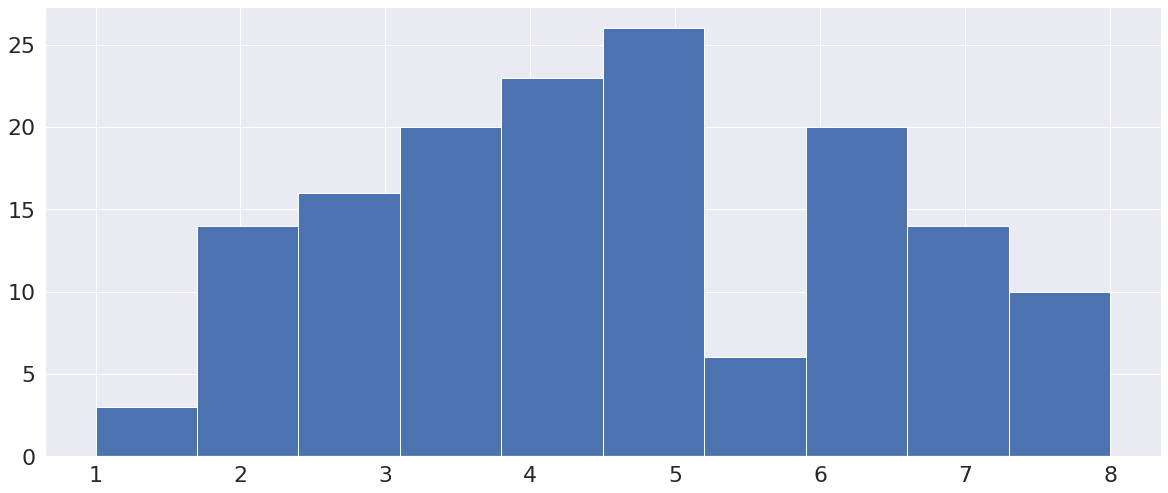

In [60]:
_ = plt.hist(graph_papers.avg_rating.apply(lambda x: float(x)))

In [153]:
graph_papers.accepted.value_counts()

False    103
True      49
Name: accepted, dtype: int64

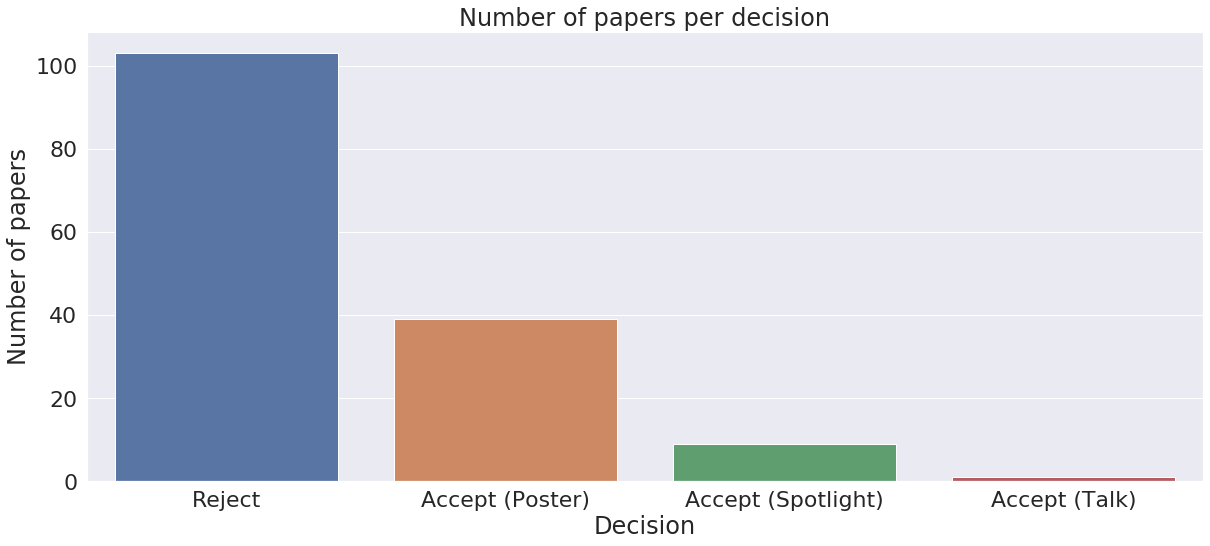

In [162]:
graph_papers.decision = pd.Categorical(graph_papers.decision, categories=['Reject', 'Accept (Poster)', 'Accept (Spotlight)', 'Accept (Talk)'], ordered=True)
sns.countplot(graph_papers.decision)
plt.xlabel('Decision')
plt.ylabel('Number of papers')
_ = plt.title('Number of papers per decision')
# graph_papers.decision.value_counts().plot('bar')

In [172]:
graph_papers['accepted'] = graph_papers.decision.str.contains('accept', case=False)

/home/s.ivanov/miniconda3/envs/deepr_python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [173]:
graph_papers

,title,url,decision,avg_rating,ratings,accepted,decision-rating
8,Memory-Based Graph Networks,https://openreview.net/forum?id=r1laNeBYPB,Accept (Poster),6.00,"[6, 6, 6, 6]",True,Accept-6.0
13,GraphQA: Protein Model Quality Assessment usin...,https://openreview.net/forum?id=HyxgBerKwB,Reject,4.00,"[3, 6, 3]",False,Reject-4.0
14,Neural Execution of Graph Algorithms,https://openreview.net/forum?id=SkgKO0EtvS,Accept (Poster),5.67,"[8, 8, 1]",True,Accept-5.67
15,Composition-based Multi-Relational Graph Convo...,https://openreview.net/forum?id=BylA_C4tPr,Accept (Poster),6.00,"[6, 6, 6]",True,Accept-6.0
44,Abstract Diagrammatic Reasoning with Multiplex...,https://openreview.net/forum?id=ByxQB1BKwH,Accept (Poster),5.00,"[6, 3, 6]",True,Accept-5.0
45,Pruned Graph Scattering Transforms,https://openreview.net/forum?id=rJeg7TEYwB,Accept (Poster),6.00,"[6, 6, 6]",True,Accept-6.0
67,FEW-SHOT LEARNING ON GRAPHS VIA SUPER-CLASSES ...,https://openreview.net/forum?id=Bkeeca4Kvr,Accept (Poster),5.00,"[6, 3, 6]",True,Accept-5.0
75,InfoGraph: Unsupervised and Semi-supervised Gr...,https://openreview.net/forum?id=r1lfF2NYvH,Accept (Spotlight),6.00,"[6, 6, 6]",True,Accept-6.0
76,A Fair Comparison of Graph Neural Networks for...,https://openreview.net/forum?id=HygDF6NFPB,Accept (Poster),6.67,"[8, 6, 6]",True,Accept-6.67
113,Visual Representation Learning with 3D View-Co...,https://openreview.net/forum?id=BJxt60VtPr,Accept (Poster),5.25,"[6, 6, 6, 3]",True,Accept-5.25


In [170]:
graph_papers.avg_rating.mean()

4.570394736842106

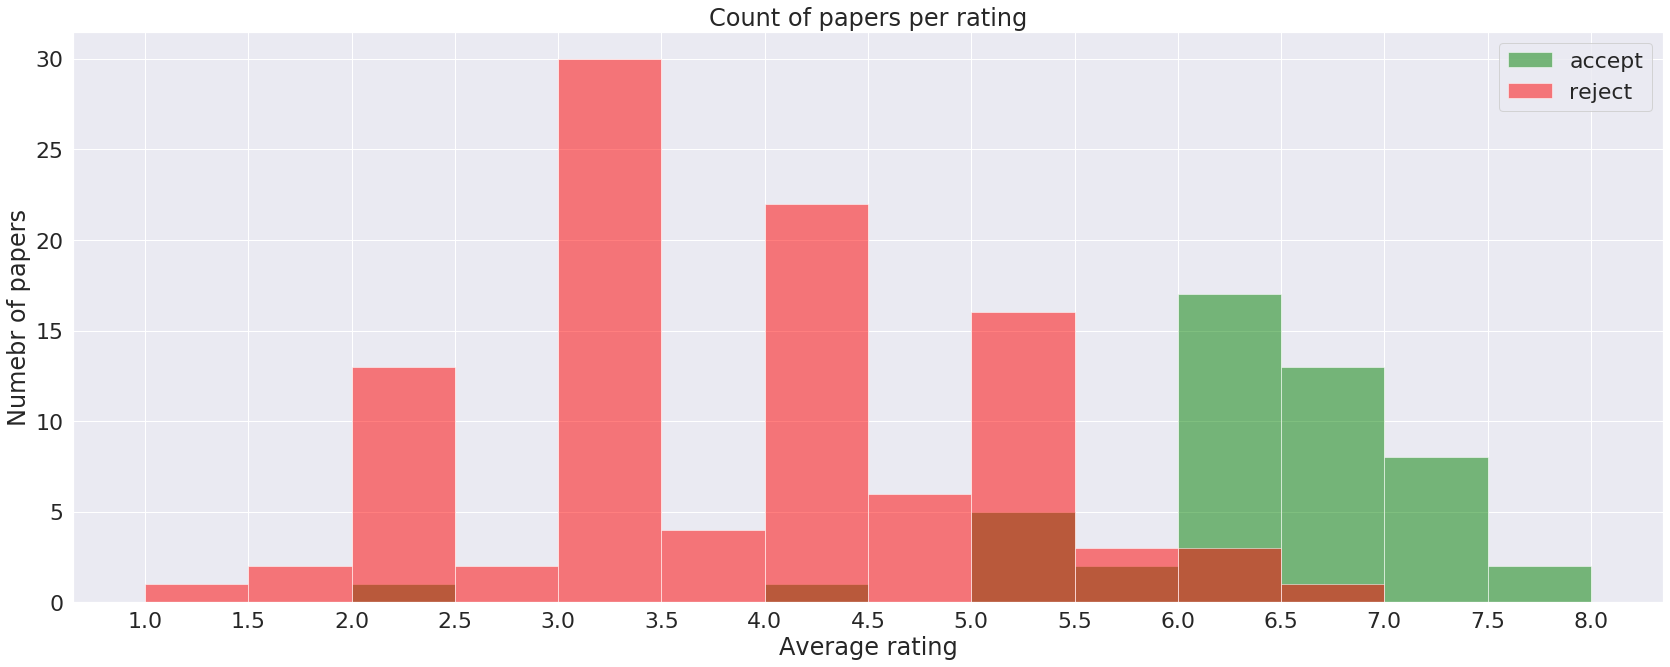

In [159]:
x = graph_papers[graph_papers.accepted].avg_rating
y = graph_papers[~graph_papers.accepted].avg_rating
fig = plt.gcf()
fig.set_size_inches(28.5, 10.5)
bins = np.arange(1,8.1, 0.5)
plt.hist(x, alpha=0.5, bins=bins, label='accept', color='green')
plt.hist(y, alpha=0.5, bins=bins, label='reject', color='red')
plt.legend()
plt.xlabel('Average rating')
plt.ylabel('Numebr of papers')
plt.title('Count of papers per rating')
_ = plt.xticks(bins)